# Data Loading and SQL

#### Note: My results are not the most accurate since I had to reduce the number of rounds for my XGBoost model and number of trees and layers for Random Forest, since my laptop crashed the first time after running my Random Forest model. I had to restart the notebook (my initial XGBoost had a much lower normalised RMSE)

In [298]:
#read the files
import pandas as pd
features = pd.read_csv("data\\features.csv")
sampleSubmission  = pd.read_csv("data\\sampleSubmission.csv")
stores = pd.read_csv("data\\stores.csv")
test = pd.read_csv("data\\test.csv")
train = pd.read_csv("data\\train.csv")

In [203]:
#lets now connect to an sql database
!pip install pymysql

In [204]:
import pymysql

conn = pymysql.connect(
    host=os.getenv('DB_HOST'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    db=os.getenv('DB_NAME'),
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

In [4]:
!pip install SQLAlchemy

In [5]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('mysql+pymysql://Amit:Vigour2002!!@AB/walmart_db')

features.to_sql(name='features', con=engine, if_exists='replace', index=False)
sampleSubmission.to_sql(name='sampleSubmission', con=engine, if_exists='replace', index=False)
stores.to_sql(name='stores', con=engine, if_exists='replace', index=False)
test.to_sql(name='test', con=engine, if_exists='replace', index=False)
train.to_sql(name='train', con=engine, if_exists='replace', index=False)

C:\Users\Amit\anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'sampleSubmission' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


421570

# Data Cleaning

In [299]:
#now we move onto data cleaning
#look for dfs with the null values in columns first
def findNulls(dataframe):
    totalRows = len(dataframe)
    for column in dataframe.columns:
        numNulls = dataframe[column].isnull().sum()
        val = numNulls/totalRows
        print(f'For Column {column} we have Null Values:{numNulls}, totalRows: {totalRows} and ratio: {val}')

In [300]:
#for features
findNulls(features)

For Column Store we have Null Values:0, totalRows: 8190 and ratio: 0.0
For Column Date we have Null Values:0, totalRows: 8190 and ratio: 0.0
For Column Temperature we have Null Values:0, totalRows: 8190 and ratio: 0.0
For Column Fuel_Price we have Null Values:0, totalRows: 8190 and ratio: 0.0
For Column MarkDown1 we have Null Values:4158, totalRows: 8190 and ratio: 0.5076923076923077
For Column MarkDown2 we have Null Values:5269, totalRows: 8190 and ratio: 0.6433455433455434
For Column MarkDown3 we have Null Values:4577, totalRows: 8190 and ratio: 0.5588522588522589
For Column MarkDown4 we have Null Values:4726, totalRows: 8190 and ratio: 0.577045177045177
For Column MarkDown5 we have Null Values:4140, totalRows: 8190 and ratio: 0.5054945054945055
For Column CPI we have Null Values:585, totalRows: 8190 and ratio: 0.07142857142857142
For Column Unemployment we have Null Values:585, totalRows: 8190 and ratio: 0.07142857142857142
For Column IsHoliday we have Null Values:0, totalRows: 8190

In [301]:
findNulls(sampleSubmission)

For Column Id we have Null Values:0, totalRows: 115064 and ratio: 0.0
For Column Weekly_Sales we have Null Values:0, totalRows: 115064 and ratio: 0.0


In [302]:
findNulls(stores)

For Column Store we have Null Values:0, totalRows: 45 and ratio: 0.0
For Column Type we have Null Values:0, totalRows: 45 and ratio: 0.0
For Column Size we have Null Values:0, totalRows: 45 and ratio: 0.0


In [303]:
findNulls(train)

For Column Store we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Dept we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Date we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Weekly_Sales we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column IsHoliday we have Null Values:0, totalRows: 421570 and ratio: 0.0


In [304]:
findNulls(test)

For Column Store we have Null Values:0, totalRows: 115064 and ratio: 0.0
For Column Dept we have Null Values:0, totalRows: 115064 and ratio: 0.0
For Column Date we have Null Values:0, totalRows: 115064 and ratio: 0.0
For Column IsHoliday we have Null Values:0, totalRows: 115064 and ratio: 0.0


In [305]:
"""we find out that it is only features that has the columns with Null Values"""

'we find out that it is only features that has the columns with Null Values'

In [306]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [307]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [308]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [309]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [310]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [311]:
#merge train and test with the stores dataset
trainMerge = pd.merge(train,stores,on='Store')
testMerge = pd.merge(test,stores,on='Store')

In [312]:
trainMerge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [313]:
testMerge.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [314]:
#now merge them with features on both store and date for the day by day breakdown by store
trainFinal = pd.merge(trainMerge,features,on=['Store','Date'])
testFinal = pd.merge(testMerge,features,on=['Store','Date'])

In [315]:
trainFinal.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [316]:
trainFinal = trainFinal.drop(columns = ['IsHoliday_y'])

In [317]:
trainFinal = trainFinal.rename(columns = {"IsHoliday_x":"IsHoliday"})

In [318]:
testFinal.head()

,Store,Dept,Date,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False


In [319]:
testFinal = testFinal.drop(columns = ['IsHoliday_y'])

In [320]:
testFinal = testFinal.rename(columns = {"IsHoliday_x":"IsHoliday"})

In [321]:
"""now we can start to add features.
The most important is to add a special weighing indicator in"""

#create a new column
trainFinal['Holiday_Weight'] = 1
testFinal['Holiday_Weight'] = 1

#then add 5 for special holidays weeks
trainFinal.loc[trainFinal['IsHoliday'] == True, 'Holiday_Weight'] = 5
testFinal.loc[testFinal['IsHoliday'] == True, 'Holiday_Weight'] = 5

In [322]:
trainFinal['Date'] = pd.to_datetime(trainFinal['Date'])
testFinal['Date'] = pd.to_datetime(testFinal['Date'])

In [323]:
"""to capture better time-series trends from the data we can extract
Day,Month,Year,Day of Week, Week number of Year"""

def timeSeries(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

In [324]:
timeSeries(trainFinal)
timeSeries(testFinal)

In [325]:
findNulls(trainFinal)

For Column Store we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Dept we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Date we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Weekly_Sales we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column IsHoliday we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Type we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Size we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Temperature we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column Fuel_Price we have Null Values:0, totalRows: 421570 and ratio: 0.0
For Column MarkDown1 we have Null Values:270889, totalRows: 421570 and ratio: 0.6425718148824632
For Column MarkDown2 we have Null Values:310322, totalRows: 421570 and ratio: 0.7361102545247528
For Column MarkDown3 we have Null Values:284479, totalRows: 421570 and ratio: 0.6748084541120098
For Column MarkDown4 we have Null 

In [326]:
"""we can loop over each store and department then fill the missing markdown values with the corresponding values
from the previous or following year.
then if both are present we can average them"""
markdowns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for store in trainFinal['Store'].unique():
    for dept in trainFinal['Dept'].unique():
        store_dept_data = trainFinal[(trainFinal['Store'] == store) & (trainFinal['Dept'] == dept)]
        store_dept_data = store_dept_data.sort_values(by='Date')
        #inner loop for forward/backward fill
        for markdown_col in markdowns:
            store_dept_data[markdown_col] = store_dept_data[markdown_col].fillna(method='ffill')
            store_dept_data[markdown_col] = store_dept_data[markdown_col].fillna(method='bfill') 
        
        trainFinal.loc[(trainFinal['Store'] == store) & (trainFinal['Dept'] == dept), :] = store_dept_data

In [327]:
"""now we drop all the rows with NaN in markdown"""
trainFinal = trainFinal.dropna(subset=markdowns)

In [328]:
"""check datatypes"""
trainFinal.dtypes

Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
IsHoliday                   bool
Type                      object
Size                       int64
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDown5                float64
CPI                      float64
Unemployment             float64
Holiday_Weight             int64
Year                       int64
Month                      int64
Day                        int64
DayOfWeek                  int64
WeekOfYear                UInt32
dtype: object

In [329]:
#xgboost will have an issue with this otherwise
trainFinal['Type'] = trainFinal['Type'].astype('category')
trainFinal['WeekOfYear'] = trainFinal['WeekOfYear'].astype('int64')
#remove date
trainFinal = trainFinal.drop(columns = ['Date'])

In [330]:
findNulls(trainFinal)

For Column Store we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column Dept we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column Weekly_Sales we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column IsHoliday we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column Type we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column Size we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column Temperature we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column Fuel_Price we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column MarkDown1 we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column MarkDown2 we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column MarkDown3 we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column MarkDown4 we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column MarkDown5 we have Null Values:0, totalRows: 420456 and ratio: 0.0
For Column C

# Training

In [331]:
#now we can begin training

## XGBoost

In [332]:
target = 'Weekly_Sales'
features = []
for column in trainFinal.columns:
    if column == 'Weekly_Sales':
        continue
    else:
        features.append(column)
print(features)

['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday_Weight', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']


In [132]:
"""Lets use XGBoost as it is good for tabular data and time and unlike ARIMA can handle data with a 
large number of variables"""
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [133]:
X_train, X_test, y_train, y_test = train_test_split(trainFinal[features], trainFinal[target], test_size=0.2, random_state=42)

train_data = xgb.DMatrix(X_train, label=y_train,enable_categorical = True)
test_data = xgb.DMatrix(X_test, label=y_test,enable_categorical = True)
#set params
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}
#now we train the model and test the data
xgb_model = xgb.train(params, train_data, num_boost_round=5000, evals=[(test_data, 'validation')], early_stopping_rounds=250)
y_pred = xgb_model.predict(test_data)

#calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

[0]	validation-rmse:26758.11377
[1]	validation-rmse:25720.56015
[2]	validation-rmse:24764.62542
[3]	validation-rmse:23848.68896
[4]	validation-rmse:23002.78803
[5]	validation-rmse:22214.43368
[6]	validation-rmse:21830.06337
[7]	validation-rmse:21120.32299
[8]	validation-rmse:20786.97765
[9]	validation-rmse:20124.66092
[10]	validation-rmse:19834.77762
[11]	validation-rmse:19212.85397
[12]	validation-rmse:18651.32899
[13]	validation-rmse:18127.44133
[14]	validation-rmse:17647.67660
[15]	validation-rmse:17186.39772
[16]	validation-rmse:16761.26336
[17]	validation-rmse:16414.97521
[18]	validation-rmse:16033.98919
[19]	validation-rmse:15873.63838
[20]	validation-rmse:15499.85726
[21]	validation-rmse:15160.66866
[22]	validation-rmse:14863.73099
[23]	validation-rmse:14573.75283
[24]	validation-rmse:14298.58474
[25]	validation-rmse:14183.02571
[26]	validation-rmse:13931.51882
[27]	validation-rmse:13664.15313
[28]	validation-rmse:13437.72553
[29]	validation-rmse:13242.23487
[30]	validation-rmse

[250]	validation-rmse:6983.91872
[251]	validation-rmse:6983.08166
[252]	validation-rmse:6975.65157
[253]	validation-rmse:6967.89245
[254]	validation-rmse:6964.18488
[255]	validation-rmse:6963.13019
[256]	validation-rmse:6962.47360
[257]	validation-rmse:6960.58432
[258]	validation-rmse:6957.29201
[259]	validation-rmse:6947.59035
[260]	validation-rmse:6939.60498
[261]	validation-rmse:6931.92641
[262]	validation-rmse:6930.88156
[263]	validation-rmse:6924.01091
[264]	validation-rmse:6918.21181
[265]	validation-rmse:6908.44073
[266]	validation-rmse:6899.07273
[267]	validation-rmse:6893.26196
[268]	validation-rmse:6887.95450
[269]	validation-rmse:6877.74770
[270]	validation-rmse:6873.16720
[271]	validation-rmse:6872.29442
[272]	validation-rmse:6866.78174
[273]	validation-rmse:6847.57137
[274]	validation-rmse:6846.64208
[275]	validation-rmse:6843.50734
[276]	validation-rmse:6828.84687
[277]	validation-rmse:6825.05082
[278]	validation-rmse:6823.63125
[279]	validation-rmse:6816.37246
[280]	vali

[499]	validation-rmse:6009.38306
[500]	validation-rmse:6005.85001
[501]	validation-rmse:6002.57195
[502]	validation-rmse:5995.01391
[503]	validation-rmse:5994.82335
[504]	validation-rmse:5991.64351
[505]	validation-rmse:5991.50880
[506]	validation-rmse:5990.10620
[507]	validation-rmse:5985.61122
[508]	validation-rmse:5976.63129
[509]	validation-rmse:5971.17354
[510]	validation-rmse:5966.50447
[511]	validation-rmse:5962.72203
[512]	validation-rmse:5962.45638
[513]	validation-rmse:5961.10093
[514]	validation-rmse:5960.88770
[515]	validation-rmse:5957.91564
[516]	validation-rmse:5948.27620
[517]	validation-rmse:5942.10880
[518]	validation-rmse:5937.66246
[519]	validation-rmse:5928.53343
[520]	validation-rmse:5926.57893
[521]	validation-rmse:5924.99070
[522]	validation-rmse:5917.32105
[523]	validation-rmse:5915.80532
[524]	validation-rmse:5914.78223
[525]	validation-rmse:5910.90179
[526]	validation-rmse:5910.67345
[527]	validation-rmse:5906.73975
[528]	validation-rmse:5906.60229
[529]	vali

[748]	validation-rmse:5450.64741
[749]	validation-rmse:5450.51113
[750]	validation-rmse:5449.79138
[751]	validation-rmse:5448.68848
[752]	validation-rmse:5446.82030
[753]	validation-rmse:5446.08357
[754]	validation-rmse:5443.87181
[755]	validation-rmse:5439.39201
[756]	validation-rmse:5437.48416
[757]	validation-rmse:5437.45798
[758]	validation-rmse:5435.97530
[759]	validation-rmse:5434.60639
[760]	validation-rmse:5434.56362
[761]	validation-rmse:5433.83533
[762]	validation-rmse:5432.64372
[763]	validation-rmse:5431.65402
[764]	validation-rmse:5427.57941
[765]	validation-rmse:5426.23809
[766]	validation-rmse:5422.57125
[767]	validation-rmse:5420.30133
[768]	validation-rmse:5418.86329
[769]	validation-rmse:5415.75998
[770]	validation-rmse:5415.47781
[771]	validation-rmse:5413.84281
[772]	validation-rmse:5413.62964
[773]	validation-rmse:5412.87262
[774]	validation-rmse:5409.22506
[775]	validation-rmse:5409.15202
[776]	validation-rmse:5404.13583
[777]	validation-rmse:5403.01021
[778]	vali

[997]	validation-rmse:5116.40402
[998]	validation-rmse:5115.50684
[999]	validation-rmse:5114.46357
[1000]	validation-rmse:5113.64390
[1001]	validation-rmse:5113.58487
[1002]	validation-rmse:5111.27904
[1003]	validation-rmse:5109.84522
[1004]	validation-rmse:5107.68610
[1005]	validation-rmse:5107.17034
[1006]	validation-rmse:5106.82496
[1007]	validation-rmse:5106.48984
[1008]	validation-rmse:5105.16522
[1009]	validation-rmse:5102.00958
[1010]	validation-rmse:5100.48016
[1011]	validation-rmse:5097.89780
[1012]	validation-rmse:5095.93732
[1013]	validation-rmse:5094.84966
[1014]	validation-rmse:5094.59194
[1015]	validation-rmse:5093.94960
[1016]	validation-rmse:5092.44855
[1017]	validation-rmse:5090.17824
[1018]	validation-rmse:5087.79544
[1019]	validation-rmse:5086.73949
[1020]	validation-rmse:5087.11042
[1021]	validation-rmse:5086.59842
[1022]	validation-rmse:5085.14685
[1023]	validation-rmse:5083.48902
[1024]	validation-rmse:5083.42845
[1025]	validation-rmse:5082.49463
[1026]	validation

[1239]	validation-rmse:4888.94577
[1240]	validation-rmse:4887.53175
[1241]	validation-rmse:4887.03622
[1242]	validation-rmse:4886.16513
[1243]	validation-rmse:4885.40317
[1244]	validation-rmse:4885.20253
[1245]	validation-rmse:4885.16089
[1246]	validation-rmse:4883.97905
[1247]	validation-rmse:4883.32841
[1248]	validation-rmse:4881.45741
[1249]	validation-rmse:4880.37693
[1250]	validation-rmse:4878.44528
[1251]	validation-rmse:4878.45183
[1252]	validation-rmse:4878.19068
[1253]	validation-rmse:4878.16842
[1254]	validation-rmse:4878.10201
[1255]	validation-rmse:4876.80231
[1256]	validation-rmse:4876.67896
[1257]	validation-rmse:4876.36081
[1258]	validation-rmse:4876.40228
[1259]	validation-rmse:4876.36368
[1260]	validation-rmse:4875.19803
[1261]	validation-rmse:4874.97776
[1262]	validation-rmse:4874.96656
[1263]	validation-rmse:4873.56076
[1264]	validation-rmse:4873.53402
[1265]	validation-rmse:4873.49153
[1266]	validation-rmse:4872.60351
[1267]	validation-rmse:4871.58999
[1268]	validat

[1480]	validation-rmse:4716.04924
[1481]	validation-rmse:4715.24945
[1482]	validation-rmse:4715.21748
[1483]	validation-rmse:4715.14656
[1484]	validation-rmse:4714.88935
[1485]	validation-rmse:4712.88274
[1486]	validation-rmse:4712.73346
[1487]	validation-rmse:4712.21383
[1488]	validation-rmse:4712.29759
[1489]	validation-rmse:4708.73038
[1490]	validation-rmse:4706.15545
[1491]	validation-rmse:4705.41356
[1492]	validation-rmse:4705.02824
[1493]	validation-rmse:4704.73593
[1494]	validation-rmse:4704.62422
[1495]	validation-rmse:4704.03104
[1496]	validation-rmse:4704.02952
[1497]	validation-rmse:4702.33493
[1498]	validation-rmse:4702.04785
[1499]	validation-rmse:4701.81724
[1500]	validation-rmse:4701.77138
[1501]	validation-rmse:4699.53374
[1502]	validation-rmse:4699.43772
[1503]	validation-rmse:4696.80264
[1504]	validation-rmse:4696.78307
[1505]	validation-rmse:4695.51158
[1506]	validation-rmse:4695.40796
[1507]	validation-rmse:4695.10876
[1508]	validation-rmse:4693.98650
[1509]	validat

[1721]	validation-rmse:4559.56048
[1722]	validation-rmse:4558.90150
[1723]	validation-rmse:4558.78646
[1724]	validation-rmse:4557.66466
[1725]	validation-rmse:4557.28800
[1726]	validation-rmse:4557.25556
[1727]	validation-rmse:4556.92443
[1728]	validation-rmse:4556.86873
[1729]	validation-rmse:4556.84355
[1730]	validation-rmse:4556.40175
[1731]	validation-rmse:4556.14437
[1732]	validation-rmse:4554.88427
[1733]	validation-rmse:4554.83116
[1734]	validation-rmse:4553.86231
[1735]	validation-rmse:4553.86147
[1736]	validation-rmse:4553.81654
[1737]	validation-rmse:4553.45786
[1738]	validation-rmse:4553.34664
[1739]	validation-rmse:4553.20268
[1740]	validation-rmse:4552.63882
[1741]	validation-rmse:4552.57832
[1742]	validation-rmse:4551.60244
[1743]	validation-rmse:4551.37505
[1744]	validation-rmse:4551.33034
[1745]	validation-rmse:4551.28314
[1746]	validation-rmse:4551.13340
[1747]	validation-rmse:4550.67995
[1748]	validation-rmse:4549.91497
[1749]	validation-rmse:4549.88779
[1750]	validat

[1962]	validation-rmse:4446.24305
[1963]	validation-rmse:4446.21665
[1964]	validation-rmse:4445.54519
[1965]	validation-rmse:4444.65471
[1966]	validation-rmse:4443.13942
[1967]	validation-rmse:4442.98584
[1968]	validation-rmse:4442.50412
[1969]	validation-rmse:4442.39484
[1970]	validation-rmse:4441.84047
[1971]	validation-rmse:4441.83512
[1972]	validation-rmse:4441.64843
[1973]	validation-rmse:4440.41699
[1974]	validation-rmse:4439.63444
[1975]	validation-rmse:4439.66411
[1976]	validation-rmse:4439.04388
[1977]	validation-rmse:4438.60693
[1978]	validation-rmse:4438.60521
[1979]	validation-rmse:4438.33849
[1980]	validation-rmse:4438.30517
[1981]	validation-rmse:4437.59123
[1982]	validation-rmse:4436.22736
[1983]	validation-rmse:4436.20889
[1984]	validation-rmse:4436.15992
[1985]	validation-rmse:4436.03577
[1986]	validation-rmse:4435.97321
[1987]	validation-rmse:4435.63476
[1988]	validation-rmse:4435.62517
[1989]	validation-rmse:4435.61535
[1990]	validation-rmse:4435.58962
[1991]	validat

[2203]	validation-rmse:4349.19618
[2204]	validation-rmse:4348.00253
[2205]	validation-rmse:4347.88318
[2206]	validation-rmse:4347.83587
[2207]	validation-rmse:4347.32091
[2208]	validation-rmse:4347.24074
[2209]	validation-rmse:4346.92538
[2210]	validation-rmse:4346.54534
[2211]	validation-rmse:4345.36794
[2212]	validation-rmse:4345.23588
[2213]	validation-rmse:4345.10328
[2214]	validation-rmse:4344.98746
[2215]	validation-rmse:4344.67339
[2216]	validation-rmse:4344.41873
[2217]	validation-rmse:4343.58036
[2218]	validation-rmse:4343.55851
[2219]	validation-rmse:4343.12631
[2220]	validation-rmse:4342.64843
[2221]	validation-rmse:4341.76881
[2222]	validation-rmse:4341.29661
[2223]	validation-rmse:4340.80095
[2224]	validation-rmse:4340.37811
[2225]	validation-rmse:4340.02432
[2226]	validation-rmse:4339.98862
[2227]	validation-rmse:4339.76553
[2228]	validation-rmse:4339.46318
[2229]	validation-rmse:4338.83576
[2230]	validation-rmse:4338.65806
[2231]	validation-rmse:4338.32859
[2232]	validat

[2444]	validation-rmse:4259.20653
[2445]	validation-rmse:4259.20960
[2446]	validation-rmse:4259.14099
[2447]	validation-rmse:4258.79462
[2448]	validation-rmse:4258.24258
[2449]	validation-rmse:4258.05311
[2450]	validation-rmse:4258.03102
[2451]	validation-rmse:4257.95566
[2452]	validation-rmse:4257.65533
[2453]	validation-rmse:4257.13764
[2454]	validation-rmse:4256.71451
[2455]	validation-rmse:4255.83829
[2456]	validation-rmse:4255.83469
[2457]	validation-rmse:4255.70755
[2458]	validation-rmse:4255.66688
[2459]	validation-rmse:4255.34148
[2460]	validation-rmse:4255.30439
[2461]	validation-rmse:4255.19858
[2462]	validation-rmse:4255.17311
[2463]	validation-rmse:4255.13457
[2464]	validation-rmse:4255.18346
[2465]	validation-rmse:4255.07780
[2466]	validation-rmse:4254.44952
[2467]	validation-rmse:4253.93254
[2468]	validation-rmse:4253.75060
[2469]	validation-rmse:4252.93033
[2470]	validation-rmse:4252.89413
[2471]	validation-rmse:4252.67510
[2472]	validation-rmse:4252.66258
[2473]	validat

[2685]	validation-rmse:4201.93569
[2686]	validation-rmse:4201.50780
[2687]	validation-rmse:4201.36389
[2688]	validation-rmse:4201.28703
[2689]	validation-rmse:4201.22477
[2690]	validation-rmse:4200.64045
[2691]	validation-rmse:4199.35285
[2692]	validation-rmse:4199.34266
[2693]	validation-rmse:4199.25920
[2694]	validation-rmse:4199.25584
[2695]	validation-rmse:4198.96419
[2696]	validation-rmse:4198.13055
[2697]	validation-rmse:4198.12934
[2698]	validation-rmse:4198.12745
[2699]	validation-rmse:4198.12210
[2700]	validation-rmse:4198.09737
[2701]	validation-rmse:4197.69479
[2702]	validation-rmse:4197.68847
[2703]	validation-rmse:4197.26638
[2704]	validation-rmse:4197.26625
[2705]	validation-rmse:4197.21340
[2706]	validation-rmse:4197.05221
[2707]	validation-rmse:4196.77547
[2708]	validation-rmse:4196.78511
[2709]	validation-rmse:4196.65435
[2710]	validation-rmse:4196.40878
[2711]	validation-rmse:4196.34077
[2712]	validation-rmse:4195.73731
[2713]	validation-rmse:4195.76163
[2714]	validat

[2926]	validation-rmse:4144.39065
[2927]	validation-rmse:4144.28289
[2928]	validation-rmse:4143.89042
[2929]	validation-rmse:4143.86564
[2930]	validation-rmse:4143.46583
[2931]	validation-rmse:4143.49043
[2932]	validation-rmse:4143.57425
[2933]	validation-rmse:4143.42861
[2934]	validation-rmse:4143.36648
[2935]	validation-rmse:4143.03194
[2936]	validation-rmse:4142.89912
[2937]	validation-rmse:4142.27280
[2938]	validation-rmse:4141.82285
[2939]	validation-rmse:4141.82444
[2940]	validation-rmse:4141.78656
[2941]	validation-rmse:4141.24410
[2942]	validation-rmse:4141.09367
[2943]	validation-rmse:4140.76325
[2944]	validation-rmse:4140.54230
[2945]	validation-rmse:4140.02444
[2946]	validation-rmse:4139.82353
[2947]	validation-rmse:4139.42891
[2948]	validation-rmse:4139.41832
[2949]	validation-rmse:4139.33871
[2950]	validation-rmse:4139.15351
[2951]	validation-rmse:4139.04780
[2952]	validation-rmse:4138.56518
[2953]	validation-rmse:4138.38673
[2954]	validation-rmse:4138.38958
[2955]	validat

[3167]	validation-rmse:4089.03188
[3168]	validation-rmse:4089.06909
[3169]	validation-rmse:4089.08221
[3170]	validation-rmse:4086.50487
[3171]	validation-rmse:4086.37355
[3172]	validation-rmse:4086.17599
[3173]	validation-rmse:4085.97345
[3174]	validation-rmse:4085.95383
[3175]	validation-rmse:4086.00617
[3176]	validation-rmse:4085.99867
[3177]	validation-rmse:4085.87740
[3178]	validation-rmse:4085.40438
[3179]	validation-rmse:4085.01099
[3180]	validation-rmse:4084.99739
[3181]	validation-rmse:4084.87553
[3182]	validation-rmse:4084.73661
[3183]	validation-rmse:4084.16298
[3184]	validation-rmse:4084.20960
[3185]	validation-rmse:4083.53080
[3186]	validation-rmse:4082.49765
[3187]	validation-rmse:4082.42419
[3188]	validation-rmse:4082.19409
[3189]	validation-rmse:4082.13483
[3190]	validation-rmse:4082.00159
[3191]	validation-rmse:4081.93554
[3192]	validation-rmse:4081.86714
[3193]	validation-rmse:4081.87287
[3194]	validation-rmse:4081.90017
[3195]	validation-rmse:4081.79526
[3196]	validat

[3408]	validation-rmse:4042.94084
[3409]	validation-rmse:4042.77503
[3410]	validation-rmse:4042.54154
[3411]	validation-rmse:4042.47729
[3412]	validation-rmse:4042.30333
[3413]	validation-rmse:4041.80158
[3414]	validation-rmse:4041.80316
[3415]	validation-rmse:4041.66289
[3416]	validation-rmse:4041.61948
[3417]	validation-rmse:4041.60459
[3418]	validation-rmse:4041.44322
[3419]	validation-rmse:4040.96233
[3420]	validation-rmse:4040.53558
[3421]	validation-rmse:4040.51007
[3422]	validation-rmse:4040.37203
[3423]	validation-rmse:4040.39103
[3424]	validation-rmse:4040.28715
[3425]	validation-rmse:4040.15215
[3426]	validation-rmse:4040.11201
[3427]	validation-rmse:4039.86091
[3428]	validation-rmse:4039.71071
[3429]	validation-rmse:4038.98483
[3430]	validation-rmse:4038.37941
[3431]	validation-rmse:4038.11337
[3432]	validation-rmse:4037.98659
[3433]	validation-rmse:4037.76168
[3434]	validation-rmse:4037.64145
[3435]	validation-rmse:4037.43049
[3436]	validation-rmse:4037.41729
[3437]	validat

[3649]	validation-rmse:3998.14020
[3650]	validation-rmse:3997.76758
[3651]	validation-rmse:3997.35862
[3652]	validation-rmse:3997.18327
[3653]	validation-rmse:3997.17589
[3654]	validation-rmse:3997.09415
[3655]	validation-rmse:3997.10201
[3656]	validation-rmse:3997.11324
[3657]	validation-rmse:3996.80023
[3658]	validation-rmse:3996.62451
[3659]	validation-rmse:3996.62815
[3660]	validation-rmse:3996.65984
[3661]	validation-rmse:3996.63904
[3662]	validation-rmse:3996.54361
[3663]	validation-rmse:3996.13480
[3664]	validation-rmse:3995.76550
[3665]	validation-rmse:3995.64705
[3666]	validation-rmse:3995.64038
[3667]	validation-rmse:3995.62886
[3668]	validation-rmse:3995.62412
[3669]	validation-rmse:3995.63937
[3670]	validation-rmse:3994.57118
[3671]	validation-rmse:3994.34128
[3672]	validation-rmse:3994.05714
[3673]	validation-rmse:3993.86785
[3674]	validation-rmse:3993.72476
[3675]	validation-rmse:3993.72123
[3676]	validation-rmse:3993.31694
[3677]	validation-rmse:3993.25480
[3678]	validat

[3890]	validation-rmse:3959.17903
[3891]	validation-rmse:3958.89657
[3892]	validation-rmse:3958.78652
[3893]	validation-rmse:3958.73061
[3894]	validation-rmse:3958.47785
[3895]	validation-rmse:3958.36830
[3896]	validation-rmse:3958.47085
[3897]	validation-rmse:3958.24015
[3898]	validation-rmse:3958.02503
[3899]	validation-rmse:3957.93829
[3900]	validation-rmse:3957.60832
[3901]	validation-rmse:3957.39852
[3902]	validation-rmse:3957.18013
[3903]	validation-rmse:3957.08254
[3904]	validation-rmse:3956.99401
[3905]	validation-rmse:3956.27243
[3906]	validation-rmse:3956.24084
[3907]	validation-rmse:3956.19016
[3908]	validation-rmse:3955.93525
[3909]	validation-rmse:3955.45599
[3910]	validation-rmse:3955.45303
[3911]	validation-rmse:3955.16063
[3912]	validation-rmse:3954.75864
[3913]	validation-rmse:3954.62000
[3914]	validation-rmse:3954.61597
[3915]	validation-rmse:3954.09803
[3916]	validation-rmse:3954.02334
[3917]	validation-rmse:3954.00478
[3918]	validation-rmse:3954.00896
[3919]	validat

[4131]	validation-rmse:3921.39379
[4132]	validation-rmse:3921.37255
[4133]	validation-rmse:3921.19228
[4134]	validation-rmse:3921.22993
[4135]	validation-rmse:3920.68416
[4136]	validation-rmse:3920.47905
[4137]	validation-rmse:3920.40345
[4138]	validation-rmse:3920.42048
[4139]	validation-rmse:3920.29750
[4140]	validation-rmse:3920.17517
[4141]	validation-rmse:3920.58172
[4142]	validation-rmse:3920.57832
[4143]	validation-rmse:3920.50266
[4144]	validation-rmse:3920.37610
[4145]	validation-rmse:3920.11447
[4146]	validation-rmse:3920.12711
[4147]	validation-rmse:3920.07544
[4148]	validation-rmse:3920.08403
[4149]	validation-rmse:3920.04293
[4150]	validation-rmse:3919.75757
[4151]	validation-rmse:3919.65000
[4152]	validation-rmse:3919.28681
[4153]	validation-rmse:3919.14066
[4154]	validation-rmse:3919.09464
[4155]	validation-rmse:3918.64017
[4156]	validation-rmse:3918.58583
[4157]	validation-rmse:3918.28832
[4158]	validation-rmse:3918.30537
[4159]	validation-rmse:3918.27035
[4160]	validat

[4372]	validation-rmse:3890.78666
[4373]	validation-rmse:3890.57240
[4374]	validation-rmse:3890.52042
[4375]	validation-rmse:3890.54903
[4376]	validation-rmse:3890.57297
[4377]	validation-rmse:3890.47052
[4378]	validation-rmse:3890.44619
[4379]	validation-rmse:3890.20203
[4380]	validation-rmse:3890.21542
[4381]	validation-rmse:3890.14665
[4382]	validation-rmse:3890.13872
[4383]	validation-rmse:3890.05674
[4384]	validation-rmse:3889.97411
[4385]	validation-rmse:3889.99765
[4386]	validation-rmse:3890.07690
[4387]	validation-rmse:3889.87824
[4388]	validation-rmse:3889.85104
[4389]	validation-rmse:3889.71224
[4390]	validation-rmse:3889.58595
[4391]	validation-rmse:3889.21167
[4392]	validation-rmse:3889.18950
[4393]	validation-rmse:3889.13690
[4394]	validation-rmse:3889.12675
[4395]	validation-rmse:3889.12064
[4396]	validation-rmse:3889.23703
[4397]	validation-rmse:3888.73097
[4398]	validation-rmse:3888.36957
[4399]	validation-rmse:3888.16480
[4400]	validation-rmse:3887.84863
[4401]	validat

[4613]	validation-rmse:3861.25779
[4614]	validation-rmse:3861.22737
[4615]	validation-rmse:3861.19309
[4616]	validation-rmse:3861.19204
[4617]	validation-rmse:3860.79958
[4618]	validation-rmse:3860.72826
[4619]	validation-rmse:3860.71182
[4620]	validation-rmse:3860.71196
[4621]	validation-rmse:3860.58429
[4622]	validation-rmse:3860.53734
[4623]	validation-rmse:3860.36767
[4624]	validation-rmse:3860.23762
[4625]	validation-rmse:3860.08969
[4626]	validation-rmse:3860.04760
[4627]	validation-rmse:3860.05384
[4628]	validation-rmse:3859.89919
[4629]	validation-rmse:3859.81934
[4630]	validation-rmse:3859.81206
[4631]	validation-rmse:3859.66583
[4632]	validation-rmse:3859.57074
[4633]	validation-rmse:3859.44092
[4634]	validation-rmse:3859.37546
[4635]	validation-rmse:3859.35846
[4636]	validation-rmse:3859.31268
[4637]	validation-rmse:3858.99649
[4638]	validation-rmse:3858.98440
[4639]	validation-rmse:3858.97673
[4640]	validation-rmse:3858.97289
[4641]	validation-rmse:3858.90989
[4642]	validat

[4854]	validation-rmse:3833.56871
[4855]	validation-rmse:3833.55567
[4856]	validation-rmse:3833.66535
[4857]	validation-rmse:3833.67149
[4858]	validation-rmse:3833.76362
[4859]	validation-rmse:3833.56272
[4860]	validation-rmse:3833.37862
[4861]	validation-rmse:3833.36381
[4862]	validation-rmse:3833.36967
[4863]	validation-rmse:3833.34401
[4864]	validation-rmse:3833.31119
[4865]	validation-rmse:3833.42662
[4866]	validation-rmse:3833.14355
[4867]	validation-rmse:3833.05254
[4868]	validation-rmse:3832.75459
[4869]	validation-rmse:3832.73614
[4870]	validation-rmse:3832.73580
[4871]	validation-rmse:3832.75274
[4872]	validation-rmse:3832.74386
[4873]	validation-rmse:3832.73730
[4874]	validation-rmse:3832.74869
[4875]	validation-rmse:3832.83062
[4876]	validation-rmse:3832.77120
[4877]	validation-rmse:3832.54504
[4878]	validation-rmse:3832.48619
[4879]	validation-rmse:3832.22441
[4880]	validation-rmse:3832.11795
[4881]	validation-rmse:3832.12286
[4882]	validation-rmse:3831.91610
[4883]	validat

In [134]:
mean_sales = y_test.mean()
nrmse = rmse / mean_sales
print(f'Normalized RMSE: {nrmse}')

Normalized RMSE: 0.23941347551297298


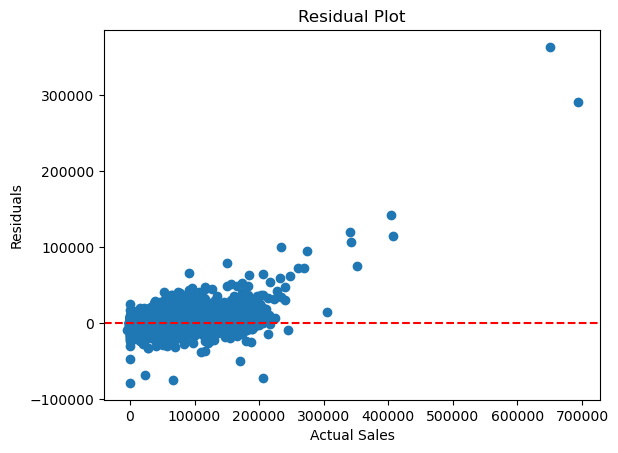

In [135]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Random Forest

In [136]:
#now lets try a random forest model and then create an ensemble model

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
#however my dataset has non-numeric features so I need to convert them first

In [ ]:
trainFinal.dtypes

In [140]:
trainFinalRF = trainFinal.copy()

In [141]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(trainFinalRF[features], trainFinalRF[target], test_size=0.2, random_state=42)

In [142]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categoricals = ['Type','IsHoliday']

"""use one hot encoder to transform columns in our dataframe
but only if they are considered categorical otherwise we passthru"""

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categoricals)
    ],
    remainder='passthrough'  
)

#now the returned values are numPy arrays, not dataframes
X_trainRF_encoded = preprocessor.fit_transform(X_trainRF)
X_testRF_encoded = preprocessor.transform(X_testRF)

In [144]:
RFModel = RandomForestRegressor(n_estimators=300, max_depth=11, random_state=42)
RFModel.fit(X_trainRF_encoded, y_trainRF)

RF_pred = RFModel.predict(X_testRF_encoded)

rmse_rf = mean_squared_error(y_testRF, RF_pred, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 6868.427737254535


In [145]:
nrmseRF = rmse_rf / mean_sales
print(f'Normalized RMSE for RF: {nrmseRF}')

Normalized RMSE for RF: 0.4302793002771869


In [146]:
xgb_weight = 1 - nrmseRF/(nrmseRF+nrmse)
rf_weight = 1 - xgb_weight

## Ensemble Model

In [147]:
"""lets move on to using an ensemble model for the two for improved model performance
however, since XGBoost performed better than Random Forest, we can give it more weightage"""
xgb_pred = xgb_model.predict(test_data)  
rf_pred = RFModel.predict(X_testRF_encoded) 

xgb_weight = 1 - nrmseRF/(nrmseRF+nrmse)
rf_weight = 1 - xgb_weight

ensemble_pred_weighted = (xgb_weight * xgb_pred) + (rf_weight * rf_pred)

rmse_ensemble = mean_squared_error(y_test, ensemble_pred_weighted, squared=False)
print(f'Ensemble RMSE: {rmse_ensemble}')

Ensemble RMSE: 5355.319047875833


In [148]:
normalised_ensemble_RMSE = rmse_ensemble / mean_sales
print(normalised_ensemble_RMSE)

0.33548914261448987


In [333]:
markdowns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for store in testFinal['Store'].unique():
    for dept in testFinal['Dept'].unique():
        store_dept_data = testFinal[(testFinal['Store'] == store) & (testFinal['Dept'] == dept)]
        store_dept_data = store_dept_data.sort_values(by='Date')
        #inner loop for forward/backward fill
        for markdown_col in markdowns:
            store_dept_data[markdown_col] = store_dept_data[markdown_col].fillna(method='ffill')
            store_dept_data[markdown_col] = store_dept_data[markdown_col].fillna(method='bfill') 
        
        testFinal.loc[(testFinal['Store'] == store) & (testFinal['Dept'] == dept), :] = store_dept_data

In [334]:
#perform same type conversions on testFinal
testFinal['Type'] = testFinal['Type'].astype('category')
testFinal['WeekOfYear'] = testFinal['WeekOfYear'].astype('int64')
#remove date
testFinal = testFinal.drop(columns = ['Date'])

In [335]:
testFinal = testFinal.dropna(subset=markdowns)

In [336]:
#we have a lot of NaN values for CPI and Unemployment so we will fill those up
testFinal['CPI'].fillna(method='ffill', inplace=True)
testFinal['CPI'].fillna(method='bfill', inplace=True)
testFinal['Unemployment'].fillna(method='ffill', inplace=True)
testFinal['Unemployment'].fillna(method='bfill', inplace=True)

In [337]:
findNulls(testFinal)

For Column Store we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column Dept we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column IsHoliday we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column Type we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column Size we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column Temperature we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column Fuel_Price we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column MarkDown1 we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column MarkDown2 we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column MarkDown3 we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column MarkDown4 we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column MarkDown5 we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column CPI we have Null Values:0, totalRows: 114708 and ratio: 0.0
For Column Unemployme

In [341]:
testFinal_DMatrix = xgb.DMatrix(testFinal[features], enable_categorical=True)

In [342]:
testFinal_encoded = preprocessor.transform(testFinal)

In [343]:
xgb_test_pred = xgb_model.predict(testFinal_DMatrix)  
rf_test_pred = RFModel.predict(testFinal_encoded)
ensemble_pred_weighted = (xgb_weight * xgb_test_pred) + (rf_weight * rf_test_pred)

In [344]:
testFinal['Weekly_Sales'] = ensemble_pred_weighted
print(testFinal.head())

   Store  Dept  IsHoliday Type    Size  Temperature  Fuel_Price  MarkDown1  \
0      1     1      False    A  151315        55.32       3.386    6766.44   
1      1     2      False    A  151315        55.32       3.386    6766.44   
2      1     3      False    A  151315        55.32       3.386    6766.44   
3      1     4      False    A  151315        55.32       3.386    6766.44   
4      1     5      False    A  151315        55.32       3.386    6766.44   

   MarkDown2  MarkDown3  ...  MarkDown5         CPI  Unemployment  \
0     5147.7      50.82  ...    2737.42  223.462779         6.573   
1     5147.7      50.82  ...    2737.42  223.462779         6.573   
2     5147.7      50.82  ...    2737.42  223.462779         6.573   
3     5147.7      50.82  ...    2737.42  223.462779         6.573   
4     5147.7      50.82  ...    2737.42  223.462779         6.573   

   Holiday_Weight  Year  Month  Day  DayOfWeek  WeekOfYear  Weekly_Sales  
0               1  2012     11    2      

In [345]:
testFinal.to_csv('testFinal_with_predictions.csv', index=False)

In [354]:
testFinal.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Holiday_Weight', 'Year', 'Month',
       'Day', 'DayOfWeek', 'WeekOfYear', 'Weekly_Sales'],
      dtype='object')

# Data Visualisations and Recommendations

In [ ]:
"""now we shall perform same data visualisations for the key recommendations to stakeholders"""

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

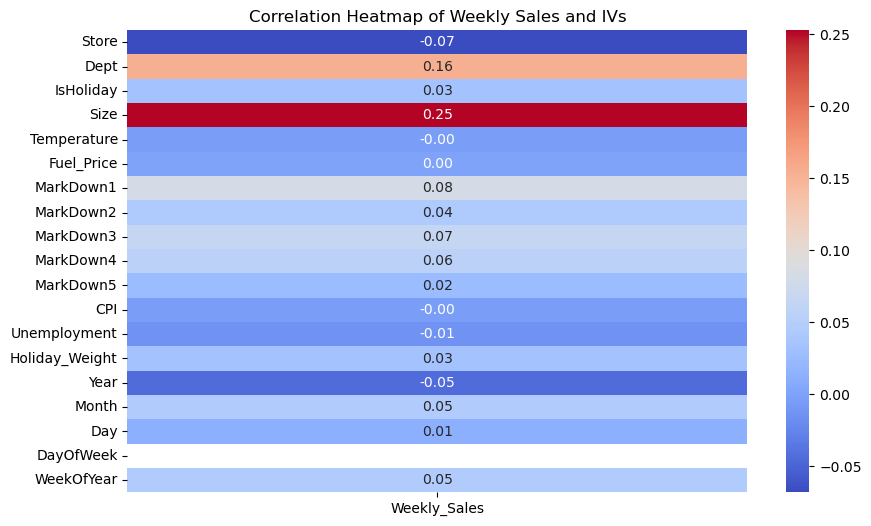

In [357]:
corMatrix = testFinal[features + ['Weekly_Sales']].corr()
#drop self correlation here
corMatrix = corMatrix[['Weekly_Sales']].drop('Weekly_Sales')

plt.figure(figsize=(10, 6))
sns.heatmap(corMatrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Weekly Sales and IVs')
plt.show()

#### We can see that the Size of the Store has the highest correlation with the Weekly Sales. Bigger stores tend to sell more products

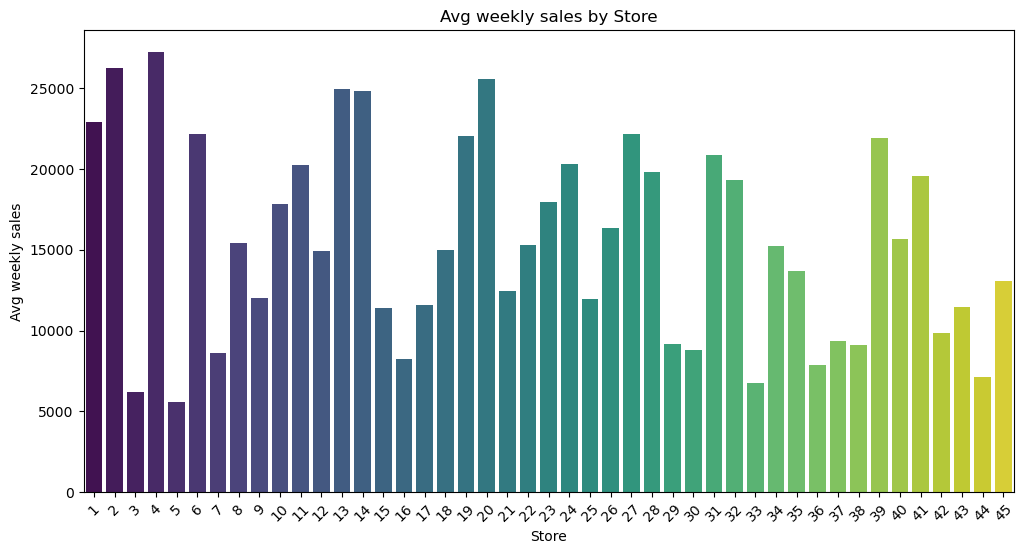

In [358]:
#calculate average weekly sales per store
store_sales = testFinal.groupby('Store')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Avg weekly sales by Store')
plt.xlabel('Store')
plt.ylabel('Avg weekly sales')
plt.xticks(rotation=45)
plt.show()

#### We can extrapolate from this the top performing stores and the worst performing stores so that stakeholders can decide which stores will bring them the most revenue

In [403]:
#lets plot Weekly Sales by Store type
type_sales_grouped = testFinal.groupby(['Type'])

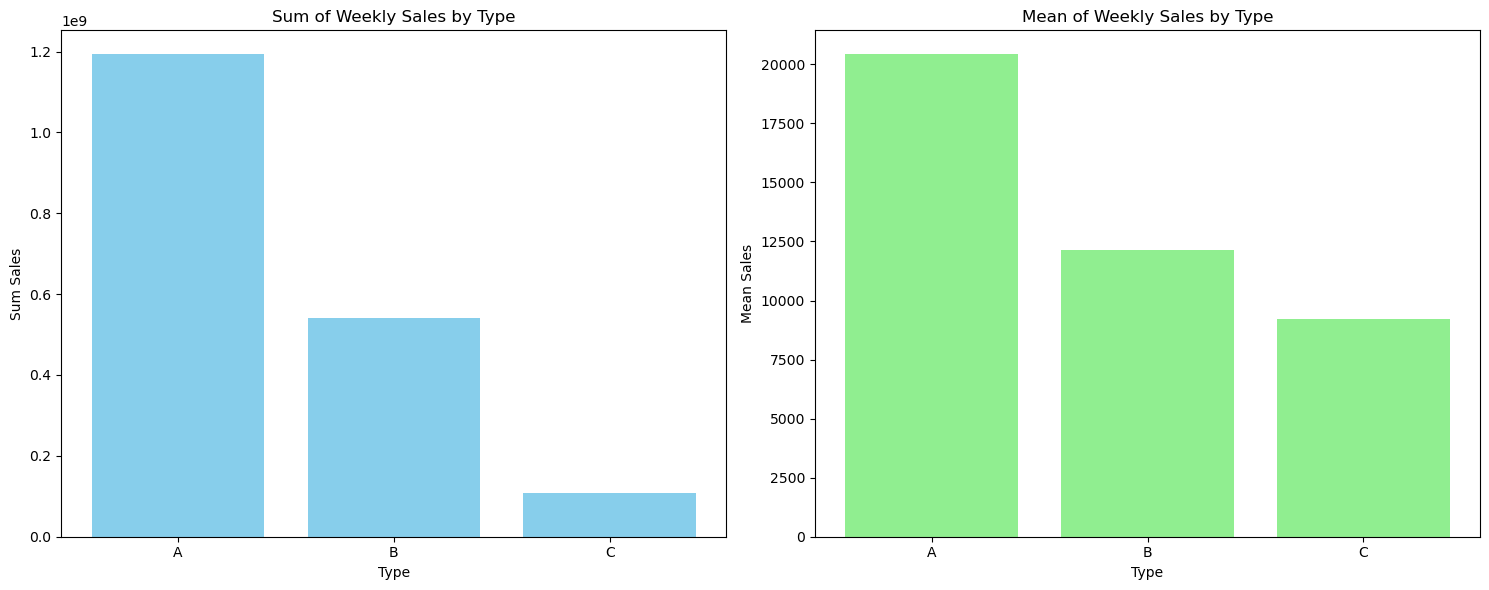

In [412]:
sum_sales = type_sales_grouped['Weekly_Sales'].sum().reset_index()
mean_sales = type_sales_grouped['Weekly_Sales'].mean().reset_index()

#rename for clarity
sum_sales.columns = ['Type', 'Sum_Sales']
mean_sales.columns = ['Type', 'Mean_Sales']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(sum_sales['Type'], sum_sales['Sum_Sales'], color='skyblue')
axes[0].set_title('Sum of Weekly Sales by Type')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Sum Sales')

axes[1].bar(mean_sales['Type'], mean_sales['Mean_Sales'], color='lightgreen')
axes[1].set_title('Mean of Weekly Sales by Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Mean Sales')

plt.tight_layout()
plt.show()

#### We can see that Type A contributes the most to sales. Each Type A also has the highest average sales. 

#### Type B is the second highest for both. However, Type C on average contributes just a bit less sales than Type B, but there are much fewer Type C stores

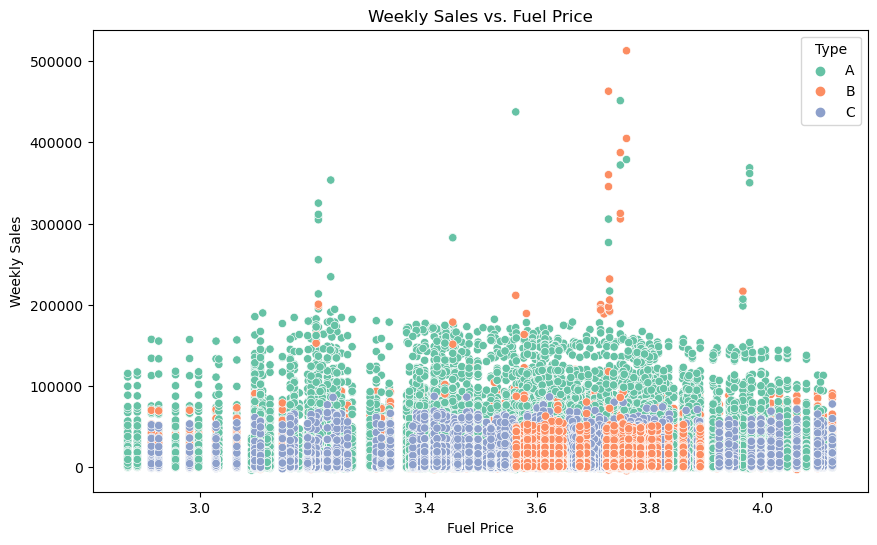

In [362]:
#scatter plot of weekly sales vs fuel prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=testFinal, x='Fuel_Price', y='Weekly_Sales', hue='Type', palette='Set2')
plt.title('Weekly Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

#### There is no real correlation between weekly sales and fuel prices, as you can see from this graph

In [386]:
#box plot of sales vs holiday weeks
#include only rows where Holiday Weight is 5
holiday_sales = testFinal[testFinal['IsHoliday'] == True]
holiday_sales_grouped = holiday_sales.groupby(['WeekOfYear','Year'])

In [387]:
holiday_sales_grouped.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Holiday_Weight,Year,Month,Day,DayOfWeek,WeekOfYear,Weekly_Sales
213,1,1,True,A,151315,56.23,3.211,883.59,4.17,74910.32,...,303.32,223.561947,6.573,5,2012,11,23,4,47,20141.520237
214,1,2,True,A,151315,56.23,3.211,883.59,4.17,74910.32,...,303.32,223.561947,6.573,5,2012,11,23,4,47,42409.628003
215,1,3,True,A,151315,56.23,3.211,883.59,4.17,74910.32,...,303.32,223.561947,6.573,5,2012,11,23,4,47,18587.506627
216,1,4,True,A,151315,56.23,3.211,883.59,4.17,74910.32,...,303.32,223.561947,6.573,5,2012,11,23,4,47,38921.181142
217,1,5,True,A,151315,56.23,3.211,883.59,4.17,74910.32,...,303.32,223.561947,6.573,5,2012,11,23,4,47,67091.298943
576,1,1,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,...,1208.86,223.960414,6.573,5,2012,12,28,4,52,22346.027351
577,1,2,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,...,1208.86,223.960414,6.573,5,2012,12,28,4,52,40950.874285
578,1,3,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,...,1208.86,223.960414,6.573,5,2012,12,28,4,52,15177.823415
579,1,4,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,...,1208.86,223.960414,6.573,5,2012,12,28,4,52,33167.514557
580,1,5,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,...,1208.86,223.960414,6.573,5,2012,12,28,4,52,49005.466342


In [388]:
holiday_sales_sum = holiday_sales_grouped['Weekly_Sales'].sum().reset_index()

In [389]:
holiday_sales_sum.head()

,WeekOfYear,Year,Weekly_Sales
0,6,2013,4.794613e+07
1,47,2012,6.423844e+07
2,52,2012,5.260927e+07


In [396]:
holiday_sales_sum['Week'] = holiday_sales_sum['WeekOfYear'].astype(str) + '-' + holiday_sales_sum['Year'].astype(str)

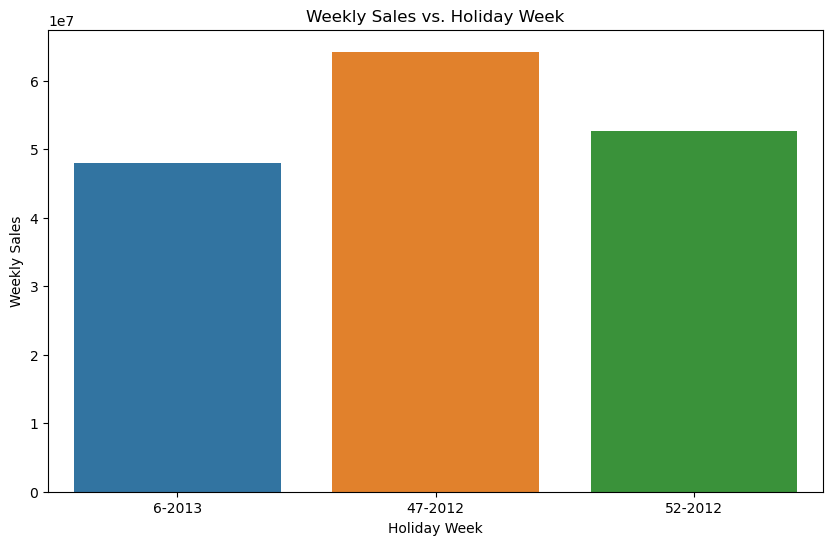

In [397]:
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_sales_sum, x='Week', y='Weekly_Sales')
plt.title('Weekly Sales vs. Holiday Week')
plt.xlabel('Holiday Week')
plt.ylabel('Weekly Sales')
plt.show()

#### From this data we can see that the most sales were on Thanksgiving, hence it is good for stores to manage stocks to take advantage of the high demand during this period

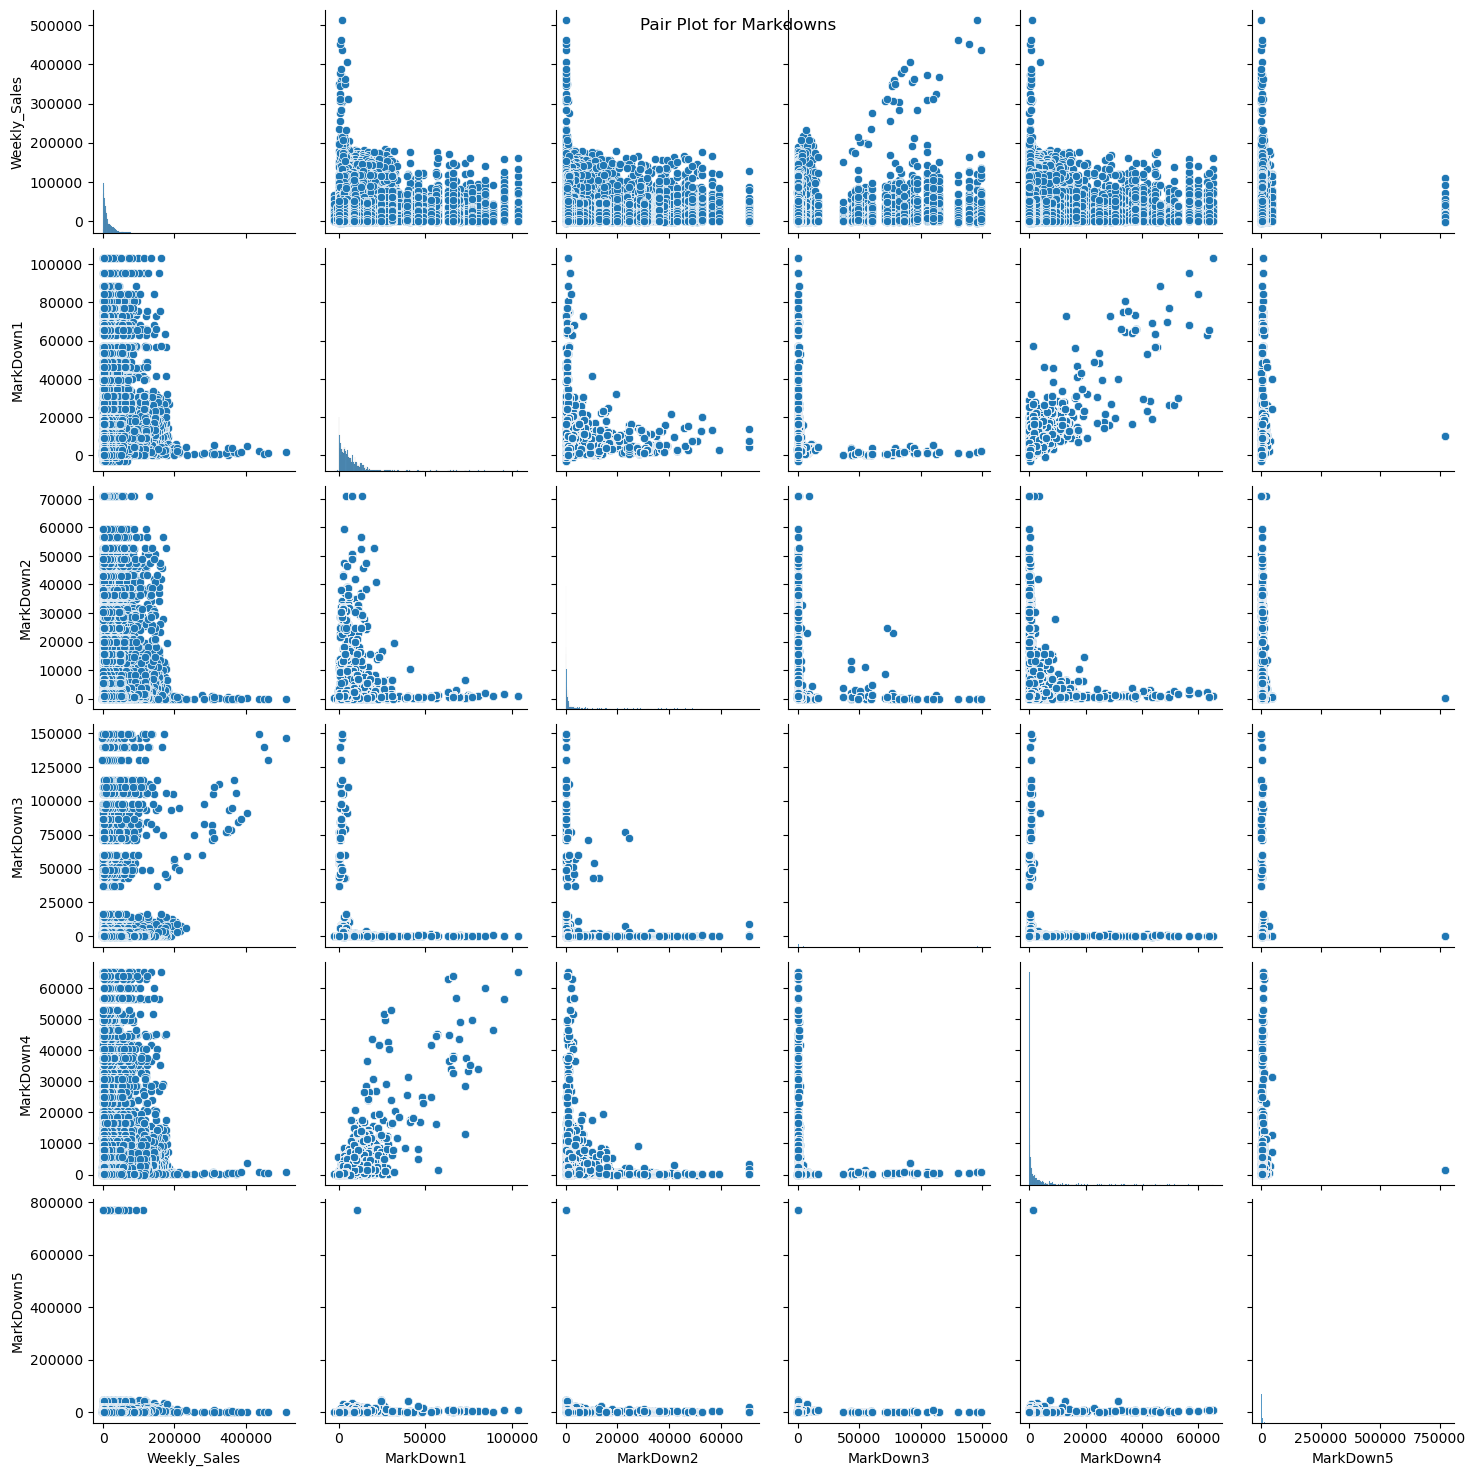

In [413]:
#finally, lets do a pairplot between Weekly_Sales and Markdowns for visualisation 
sns.pairplot(testFinal[['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3', 'MarkDown4','MarkDown5']])
plt.suptitle('Pair Plot for Markdowns')
plt.show()

#### Markdowns, particularly MarkDown1 and MarkDown2, show a positive correlation with increased weekly sales, indicating effective promotions. 

#### The impact of other markdowns is less clear as they show a weaker relationship with sales. 

#### The outliers are indicative of the significant promptions happening during holidays, which contribute to higher sales

# Recommendations to stakeholders

#### 1) Focus on Expanding and Supporting Larger Stores: Since larger stores have the highest correlation with sales, it is beneficial to invest in expanding these stores or supporting them with additional resources and inventory to maximize revenue.

#### 2) Leverage Type A Stores for growth: Type A stores contribute the most to overall sales, both in terms of total revenue and average sales per store. Prioritizing marketing and promotional efforts in these stores can significantly boost sales.

#### 3) Prepare for high demand During Thanksgiving: Thanksgiving has the highest sales, making it essential to manage stocks effectively during this period. Ensure that stores are well-prepared with sufficient inventory to meet the increased demand and optimize markdown strategies for maximum impact.